       4.4430334e+13



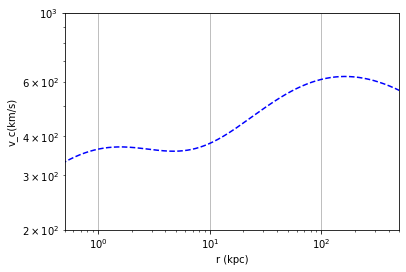

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
Nmax=2048
#x = [float(i) for i in range(0,Nmax)]
##y = [0.04375*10**(-5.0*float(i)/Nmax) for i in range(0,Nmax)]
y = [0.1725*10**(-5.0*float(i)/Nmax) for i in range(0,Nmax)]
#data = np.loadtxt("Desktop/NGC5044_AGN/profiles/radial_prof_0001")
#y = data[:,0]
#Nmax = len(y)
#y = y*3.086e21/1.2344e25
r = np.zeros(Nmax)
x1 = np.zeros(Nmax)
Nden = np.zeros(Nmax)
NTinK = np.zeros(Nmax)
Totg = np.zeros(Nmax)
Strg = np.zeros(Nmax)
svc = np.zeros(Nmax)
gden = np.zeros(Nmax)
gprs = np.zeros(Nmax)
Totp = np.zeros(Nmax)
MNFW = np.zeros(Nmax)
MHQN = np.zeros(Nmax)
geltn= np.zeros(Nmax)
tff = np.zeros(Nmax)
K = np.zeros(Nmax)
TkeV = np.zeros(Nmax)
vc = np.zeros(Nmax)
rs = 0.01925; den_unit = 3.7576e-29; 
len_unit = 1.2344e25; mue=1.17
kpc=3.086e21; msun=2.0e33; G = 6.67428e-8; Re = 6.67; M200=3.4e13
BCG=7.4; SMBH = 4.65e8; kB=1.38e-16; mu=0.617; mp=1.67e-24; c200=9.0
gma=5.0/3; invgma=1.0/gma; clight = 3.0e10; baryon_frac=0.0004; rho0= 10000.0
rho_0 =5.0*1.67e-22; a_0=1.2;
gconst = 4.0*np.pi*rho0*den_unit*(rs*len_unit)**3*(math.log(1+c200)-c200/(1.0+c200))/msun
print("%20.7e\n"%(gconst));
 
const = mu*mp*(mue*mp)**(gma-1)/(kB*1.16e7)
#+ G*BCG*msun*1.0e11/(y[i]*len_unit + (Re*kpc)) 
for i in range(0,Nmax):
    r[i] = y[i]*len_unit/3.086e21;
    x1[i] = y[i]/rs
    #Nden[i] = rho0/(x1[i]*(1.0+x1[i])**2) #NFW density
    NTinK[i] = 1.16059e7*(1.17 - (1.17-0.6)*np.exp(-y[i]*len_unit/(2.0*5.0*kpc)));
    K[i] = 1.3 + 150.15*(y[i]*len_unit/(100.0*kpc))**1.05
    ## NFW + Hernquist + Paczynski-Witta potential
    Totp[i] = -(G*gconst*msun*math.log(1+x1[i])/(math.log(1.0+c200) - c200/(1.0+c200))/(y[i]*len_unit + 1.0e-3*kpc) \
              + 2.0*3.14159*G*rho_0*(a_0*kpc)**3/(y[i]*len_unit + a_0*kpc)\
              + G*SMBH*msun/(y[i]*len_unit-2.0*G*SMBH*msun/clight**2))
    Totg[i] = G*gconst*msun*((math.log(1.0+x1[i])-x1[i]/(1.0+x1[i]))/(math.log(1.0+c200)-c200/(1.0+c200)) \
              )/(y[i]*len_unit)**2.0 \
              + 2.0*3.14159*G*rho_0*(a_0*kpc)**3/(y[i]*len_unit + a_0*kpc)**2 \
              + G*msun*SMBH/(y[i]*len_unit - 2.0*G*SMBH*msun/clight**2)**2;
    Strg[i] = 2.0*3.14159*G*rho_0*(a_0*kpc)**3/(y[i]*len_unit + a_0*kpc)**2;    
    vc[i] = math.sqrt(Totg[i]*y[i]*len_unit);
    svc[i] = math.sqrt(Strg[i]*y[i]*len_unit);
    tff[i] = math.sqrt(2.0*r[i]*3.086e21/Totg[i]);
    MNFW[i] = 4.0*np.pi*rho0*den_unit*(rs*len_unit)**3*(math.log(1+x1[i])-x1[i]/(1.0+x1[i]))/msun;
    MHQN[i] = 2.0*np.pi*rho_0*((a_0*kpc)**3)*((r[i]/a_0)/(1+(r[i]/a_0)))**2/msun;
    if (i==0):
        gden[i] = 1.0e-29;
        #gprs[i] = NTinK[i]*(Nden[i]*den_unit*baryon_frac)*kB/(mu*mp)
        #gprs[i] = NTinK[i]*gden[i]*kB/(mu*mp)
        gprs[i] = K[i]*gden[i]**(gma)/const
    if(i > 0):
        err = 1.0e20
        pg = gprs[i-1]
        while(err >=1.0e-10):
            #fn =  pg - gprs[i-1] +(0.5*mu*mp/kB)*(Totp[i]-Totp[i-1])*((pg/NTinK[i]) + gprs[i-1]/NTinK[i-1])
            #print"%20.7e\n"%(fn)
            #fnp = 1.0+ (0.5*mu*mp/kB)*(Totp[i]-Totp[i-1])/NTinK[i]
            fn = pg - gprs[i-1] + 0.5*(Totp[i]-Totp[i-1])*const**invgma \
                  *((pg/K[i])**invgma + (gprs[i-1]/K[i-1])**invgma)
            fnp = 1 + 0.5*(Totp[i]-Totp[i-1])*invgma*pg**(invgma-1.0)*(const/K[i])**invgma
            pg = pg - fn/fnp
            err = math.fabs(fn/fnp)/pg
        #print"%20.7e\n"%(fn)
        gprs[i]= pg
for i in range(0,Nmax):
        #gden[i] = gprs[i]*mu*mp/(NTinK[i]*kB)
        gden[i] = (gprs[i]*const/K[i])**invgma
        geltn[i] = gden[i]/(mue*mp)
        TkeV[i] = gprs[i]*mu*mp/(gden[i]*kB)/1.16e7
plt.loglog(r,vc/1.e5,'b--')
plt.ylim(200,1000)
plt.xlim(0.5,500)
plt.ylabel('v_c(km/s)')
plt.xlabel('r (kpc)')
plt.grid()
plt.show()
#plt.save('Desktop/initialisation/circular_vel_Tot.png')


In [3]:
gconst/1.e13

4.443033369536983

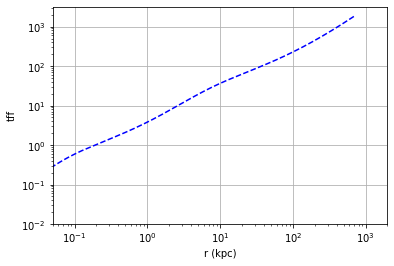

In [3]:
f = open("Desktop/vc_tff_time_5044","w")
for i in range(0,len(r)):
    f.write("%f %.7e %.7e %.7e %.7e %.7e %.7e\n"%( r[i], tff[i], vc[i], svc[i], K[i], MNFW[i], MHQN[i]))
plt.loglog(r,tff/3.15e13,'b--')
#plt.ylim(300,2000)
plt.xlim(0.05,2000)
plt.xlabel('r (kpc)')
plt.ylabel('tff')
plt.grid()
plt.show()
f.close()

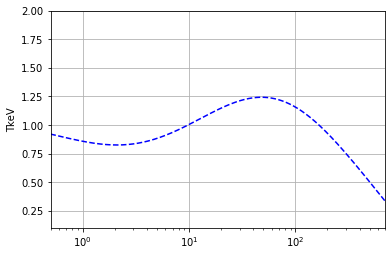

In [35]:
plt.semilogx(r,TkeV,'b--')#, r, NTinK/1.16e7,'r-')
plt.ylim(0.1,2)
plt.xlim(0.5,700)
plt.ylabel('TkeV')
plt.grid()
#plt.setp(.get_xticklabels(), visible=False)
plt.show()

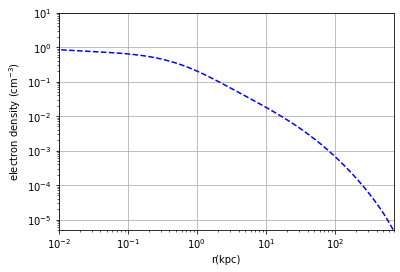

In [36]:
plt.loglog(r,geltn,'b--')
plt.xlabel('r(kpc)')
plt.ylabel('electron density (cm$^{-3}$)')
plt.xlim(0.01,700)
plt.ylim(0.000005,10)
plt.grid()
plt.show()

In [19]:
2*3.14159265*3*1.67e-22*((1.3*3.086e21)**3)/2.e33/1.e11

1.0162613761357522

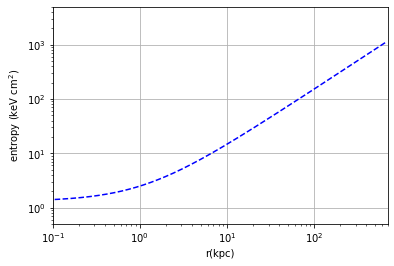

In [18]:
plt.loglog(r,K,'b--')
plt.xlabel('r(kpc)')
plt.ylabel('entropy (keV cm$^{2}$)')
plt.xlim(0.1,700)
plt.ylim(0.5,5000)
plt.grid()
plt.show()

In [51]:
MHQN

array([2.59278094e-07, 2.58984870e-07, 2.58690495e-07, ...,
       2.66038436e-15, 2.63064362e-15, 2.60123534e-15])